In [ ]:
# IN THIS FILE, THE INTERACTIONS CSV FILE CREATED BY PYTHON NOTEBOOK Building_Proximity_Based_Social_Interactions_From_Position_Data IS READ AND 
# SNA GRAPH IS CONSTRUCTED USING IGRAPH

In [3]:
# IMPORT STATEMENTS
library(igraph)
library(readr)

In [5]:
# LOAD THE CSV FILE
edges_df <- read_csv("Interactions.csv", show_col_types = FALSE)

In [6]:
# CONVERT TO AN IGRAPH OBJECT
g <- graph_from_data_frame(edges_df, directed = FALSE)

In [7]:
# PRINTING RAW DESCRIPTION OF THE GRAPH
print(g)

IGRAPH 7a3cef9 UN-- 10 43 -- 
+ attr: name (v/c), Weight (e/n)
+ edges from 7a3cef9 (vertex names):
 [1] 1--2  3--5  3--8  6--9  1--4  6--8  5--9  2--4  5--8  8--9  3--9  2--9 
[13] 2--8  4--9  6--10 3--2  5--10 2--10 1--6  8--10 1--8  4--10 5--4  8--4 
[25] 1--10 1--9  3--10 9--10 1--3  5--2  6--5  1--5  3--4  6--2  6--4  3--6 
[37] 1--7  9--7  4--7  7--10 8--7  6--7  5--7 


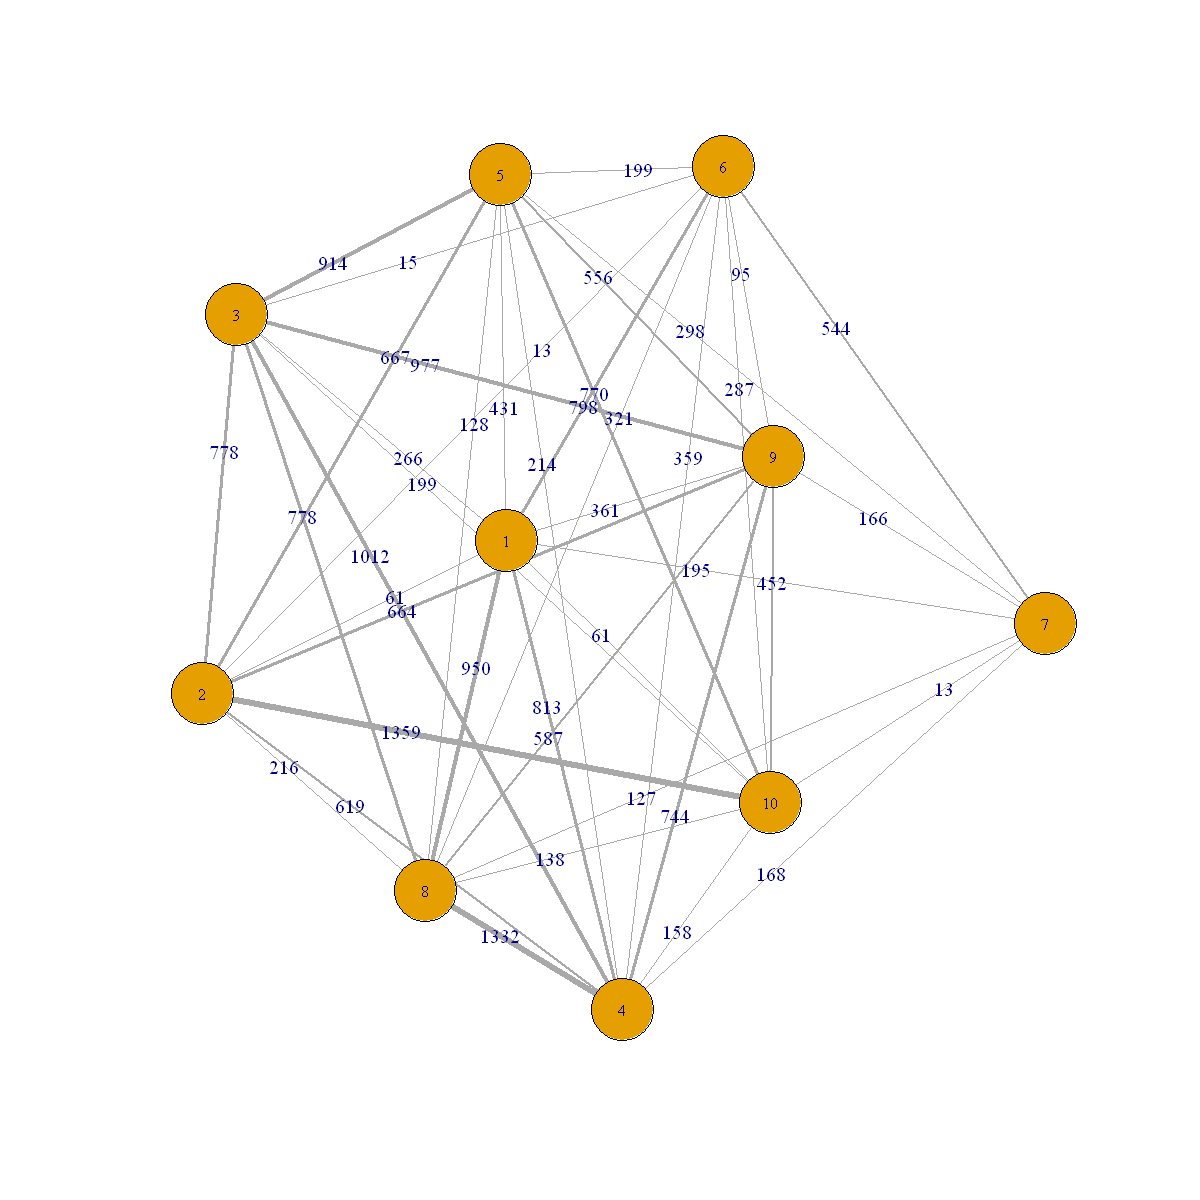

In [9]:
# PLOTTING THE SNA GRAPH
par(bg="white")
options(repr.plot.width = 10, repr.plot.height = 10)
plot(g, edge.label = E(g)$Weight, vertex.size = 15, vertex.label.cex = 0.8, 
     edge.width = E(g)$Weight / max(E(g)$Weight) * 5)

In [ ]:
# SOME SNA METRICS

In [10]:
# 1. DEGREE CENTRALITY
degree_centrality <- degree(g)
print("Degree Centrality:")
print(degree_centrality)

[1] "Degree Centrality:"
 1  3  6  5  2  8  4  9  7 10 
 9  8  9  9  8  9  9  9  7  9 


In [11]:
# 2. BETWEENNESS CENTRALITY
betweenness_centrality <- betweenness(g, directed = FALSE)
print("Betweenness Centrality:")
print(betweenness_centrality)

[1] "Betweenness Centrality:"
        1         3         6         5         2         8         4         9 
0.2857143 0.0000000 0.2857143 0.2857143 0.0000000 0.2857143 0.2857143 0.2857143 
        7        10 
0.0000000 0.2857143 


In [12]:
# 3. CLOSENESS CENTRALITY
closeness_centrality <- closeness(g)
print("Closeness Centrality:")
print(closeness_centrality)

[1] "Closeness Centrality:"
         1          3          6          5          2          8          4 
0.11111111 0.10000000 0.11111111 0.11111111 0.10000000 0.11111111 0.11111111 
         9          7         10 
0.11111111 0.09090909 0.11111111 


In [13]:
# 4. EIGENVECTOR CENTRALITY
eigenvector_centrality <- eigen_centrality(g)$vector
print("Eigenvector Centrality:")
print(eigenvector_centrality)

[1] "Eigenvector Centrality:"
        1         3         6         5         2         8         4         9 
1.0000000 0.9159925 1.0000000 1.0000000 0.9159925 1.0000000 1.0000000 1.0000000 
        7        10 
0.8099992 1.0000000 


In [14]:
# 5. GRAPH DENSITY
graph_density <- edge_density(g)
print(paste("Graph Density:", graph_density))

[1] "Graph Density: 0.955555555555555"


In [16]:
# 6. AVERAGE PATH LENGTH
if (is_connected(g)) {
  avg_path_length <- mean_distance(g, directed = FALSE)
  print(paste("Average Path Length:", avg_path_length))
} else {
  print("Graph is not connected; average path length not available.")
}

[1] "Average Path Length: 1.04444444444444"


In [17]:
# 7. CLUSTERING COEFFICIENT
clustering_coeff <- transitivity(g, type = "global")
print(paste("Clustering Coefficient:", clustering_coeff))

[1] "Clustering Coefficient: 0.957446808510638"
